In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import time 
from datetime import datetime

In [2]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace = True)
df.drop(['Date'],axis = 1,inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


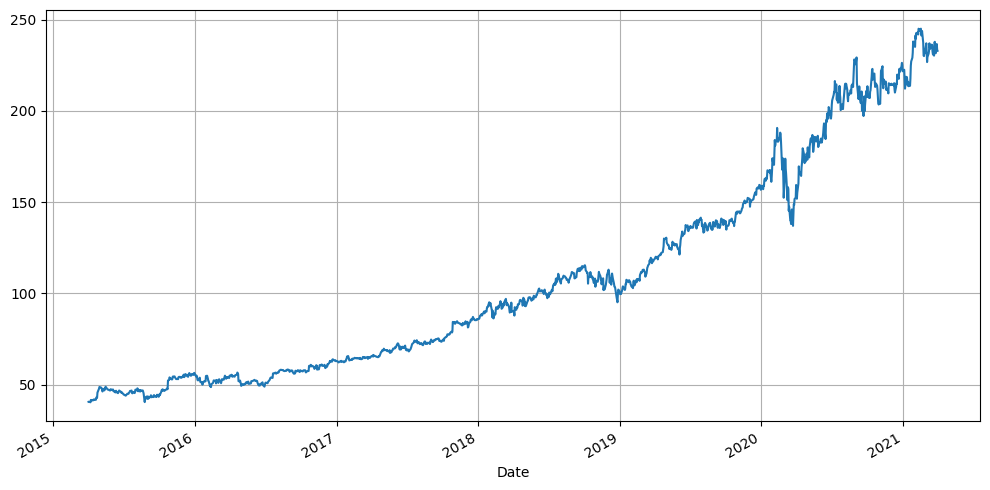

In [4]:
df['Open'].plot(figsize = (10,5))
plt.tight_layout()
plt.grid()

In [5]:
df['Rolling_10'] = df['Open'].rolling(10).mean()
df['Rolling_30'] = df['Open'].rolling(30).mean()
df['Rolling_60'] = df['Open'].rolling(60).mean()

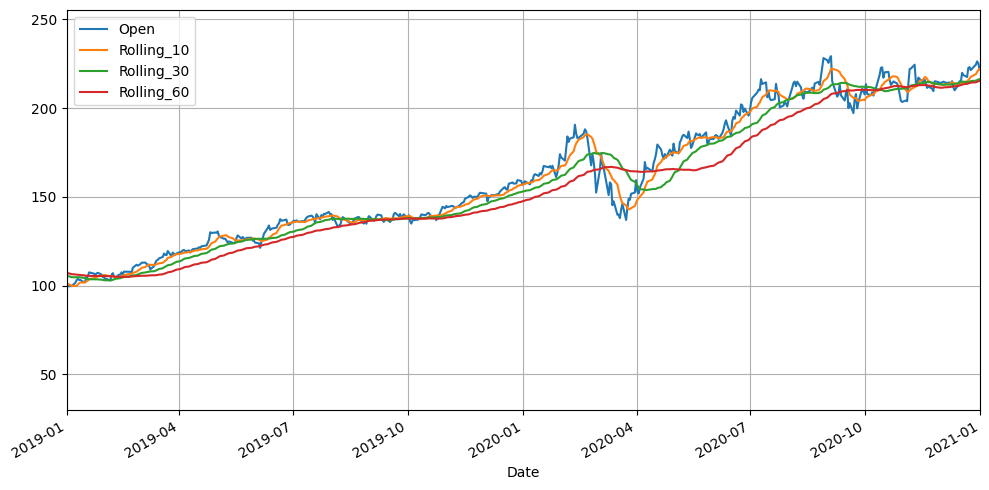

In [6]:
df[['Open','Rolling_10','Rolling_30','Rolling_60']].plot(xlim = ['2019-01-01','2021-01-01'],figsize = (10,5))
plt.tight_layout()
plt.grid()

In [7]:
df['CMA'] = df['Open'].expanding().mean()
df['EWM_0.1'] = df['Open'].ewm(alpha=0.1).mean()
df['EWM_0.2'] = df['Open'].ewm(alpha=0.2).mean()

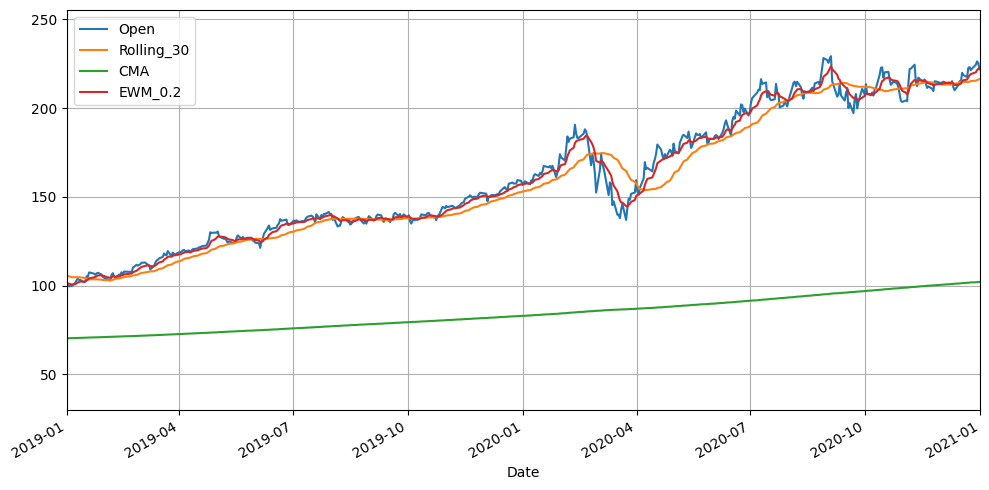

In [8]:
df[['Open','Rolling_30','CMA','EWM_0.2']].plot(xlim = ['2019-01-01','2021-01-01'],figsize=(10,5))
plt.tight_layout()
plt.grid()

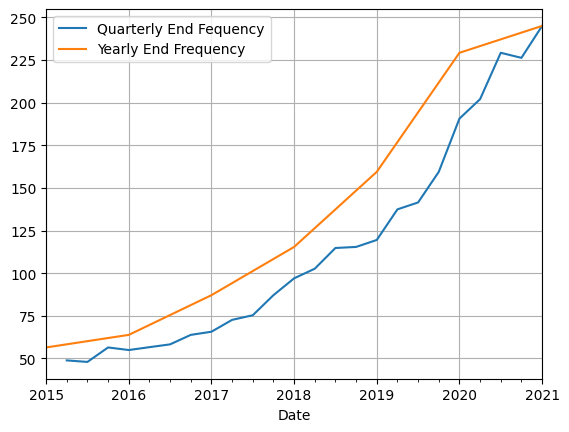

In [9]:
df['Open'].resample(rule='Q').max().plot(label = 'Quarterly End Fequency')
df['Open'].resample(rule='A').max().plot(label = 'Yearly End Frequency')
plt.legend(loc = 'best')
plt.grid()

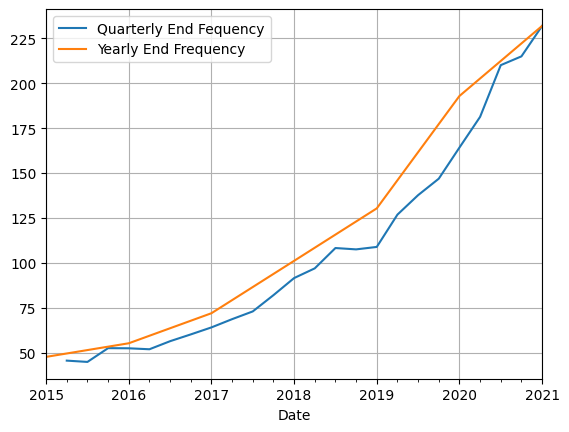

In [10]:
df['Open'].resample(rule='Q').mean().plot(label = 'Quarterly End Fequency')
df['Open'].resample(rule='A').mean().plot(label = 'Yearly End Frequency')
plt.legend(loc = 'best')
plt.grid()

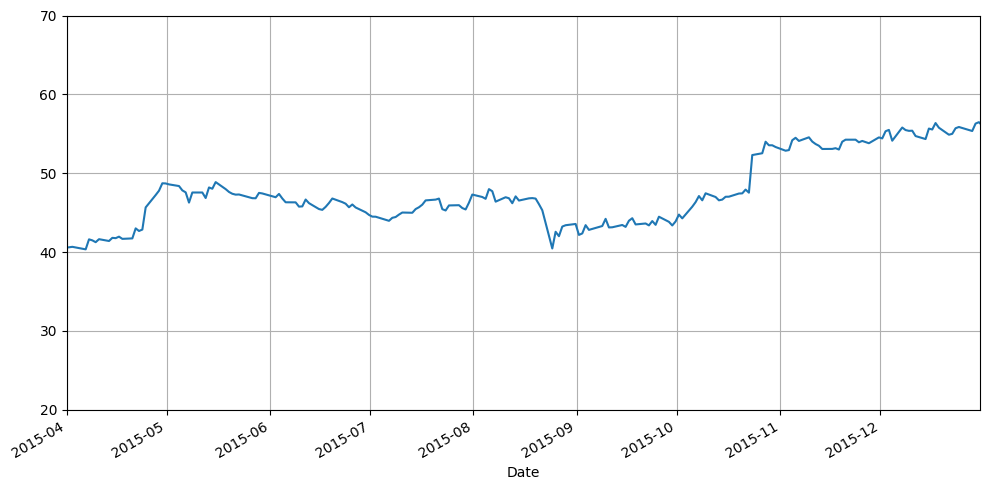

In [11]:
df['Open'].plot(xlim=['2015-04-01','2015-12-31'],ylim=[20,70],figsize=(10,5))
plt.tight_layout()
plt.grid()

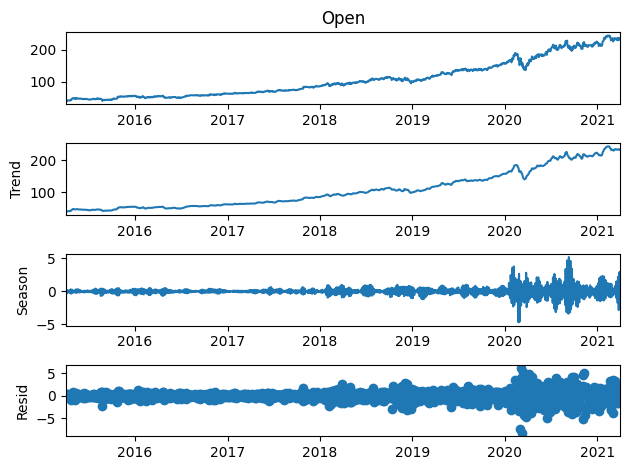

In [52]:
from statsmodels.tsa.seasonal import STL
result = STL(df['Open'],period = 4).fit()
result.plot()
plt.show()